## Pre Processing 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import csv 
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("System version: {}".format(sys.version))
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))

System version: 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version: 1.18.1
Pandas version: 0.25.3


### Read in Dataset

In [3]:
confirmed_us = pd.read_csv("../data/time_series_covid19_confirmed_US.csv")

In [4]:
confirmed_us.head(4)

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   

       Lat     Long_  ... 5/8/20  5/9/20  5/10/20  5/11/20  5/12/20  5/13/20  \
0 -14.2710 -170.1320  ...      0       0        0        0        0        0   
1  13.4443  144.7937  ...    151     151      151      151      152      152   
2  15.0979  145.6739  ...     15      16       16       19       19       19   
3  18.2208  -66.5901  ...   2156    2173     2198     2256     2299     2329   

   5/14/20  5/15/20  5/16/20  5/17/20  
0        0        0        0        0  
1      152      154      154      154  
2       19       19       21       21  
3     2427     2542     2589     2646  

[4 rows x 128 columns]

In [5]:
US = confirmed_us.loc[:,"1/22/20":]
US

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3256        0        0        0        0        0        0        0        0   
3257        0        0        0        0        0        0        0        0   
3258        0        0        0        0        0        0        0        0   
3259        0        0        0        0        0        0        0        0   
3260        0        0        0        0        0        0        0        0   

      1/30/20  1/31/20  ...  5/8/20  5/9/20  5/10/20  5/11/20  5/12/20  \
0           0        0  ...       0       0        0        0        0   
1           0        0  ...     151     151      151      151      152   
2           0        0  ...      15      16       16       19       19   
3           0        0  ...    2156    2173     2198     2256     2299   
4           0        0  ...      68      68       69       69       69   
...       ...      ...  ...     ...     ...      ...      ...      ...   
3256        0        0  ...      27      27       28       28       28   
3257        0        0  ...      13      13       13       14       13   
3258        0        0  ...     138     155      164      170      167   
3259        0        0  ...      14      16       16       16       16   
3260        0        0  ...     184     188      194      197      207   

      5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  
0           0        0        0        0        0  
1         152      152      154      154      154  
2          19       19       19       21       21  
3        2329     2427     2542     2589     2646  
4          69       69       69       69       69  
...       ...      ...      ...      ...      ...  
3256       29       29       29       29       30  
3257       13       13       13       14       14  
3258      180      187      200      209      219  
3259       16       16       16       19       19  
3260      211      214      216      221      226  

[3261 rows x 117 columns]

In [6]:
US = US.sum(axis=0)

In [7]:
US = pd.DataFrame(data = US, columns=["Confirmed"])
US

Confirmed
1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
...            ...
5/13/20    1390406
5/14/20    1417774
5/15/20    1442824
5/16/20    1467820
5/17/20    1486757

[117 rows x 1 columns]

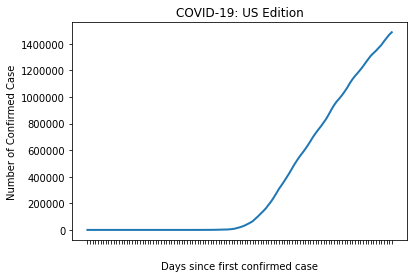

In [8]:
plt.plot(US.index, US["Confirmed"], linewidth = 2)
plt.title("COVID-19: US Edition")
plt.xlabel("Days since first confirmed case")
plt.ylabel("Number of Confirmed Case")
plt.xticks(US.index, " ")
plt.show()

##### Export to CSV

In [9]:
US.to_csv("../data/covid19_US.csv")